## Assignment 1

Marissa Berk


The data used were collected from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.


The file steps.csv  contains the data mentioned above. 

In [297]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df = pd.read_csv('steps.csv', sep=';')#semicolons in the csv are changed to commas
df.head()


id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1   2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2   3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        NaN        NaN        NaN        NaN        NaN        NaN   
4   5        NaN        NaN        NaN        NaN        NaN        NaN   

   26-6-2013  27-6-2013  28-6-2013  ...  4-5-2014  5-5-2014  6-5-2014  \
0     9929.0    12879.0    10541.0  ...       NaN       NaN       NaN   
1     4024.0     3926.0    14595.0  ...       NaN       NaN       NaN   
2     8185.0     9630.0     8983.0  ...    3914.0    4364.0       NaN   
3        NaN        NaN        NaN  ...       NaN       NaN       NaN   
4        NaN        NaN        NaN  ...       NaN       NaN       NaN   

   7-5-2014  8-5-2014  9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014  
0       NaN       NaN       NaN        NaN        NaN        NaN        NaN  
1       NaN       NaN       NaN        NaN        NaN        NaN        NaN  
2       NaN       NaN    6227.0     4567.0     2567.0     1129.0        NaN  
3       NaN       NaN       NaN        NaN        NaN        NaN        NaN  
4       NaN       NaN       NaN        NaN        NaN        NaN        NaN  

[5 rows x 329 columns]

In [298]:

df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Columns: 329 entries, id to 13-5-2014
dtypes: float64(328), int64(1)
memory usage: 2.3 MB


## Calculate the average number of steps per day for all users

The mean number of steps taken per day, for all of the users is calculated.

In [299]:
mean_steps=df.mean(axis=0)#Get the mean of steps per day
mean_steps #Call the new 'mean_steps' variable


id             465.000000
20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
                 ...     
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
13-5-2014             NaN
Length: 329, dtype: float64

As you can see by the information depicted above, the mean was also taken of the id's (465), this will incorrectly skew our data set to the left, so we need to drop this unnecessary outlier.

In [305]:
#To remove the mean of the id numbers we need to create a function that we then apply to the entire column
def below_500(x):
    if(x < 500.0): 
        return float('NaN')
    else: 
        return x
mean_steps = mean_steps[928].apply(below_500)
mean_steps



id               NaN
20-6-2013     3642.0
21-6-2013     9035.0
22-6-2013    10890.0
23-6-2013     7403.0
              ...   
9-5-2014      9571.0
10-5-2014     7615.0
11-5-2014     6806.0
12-5-2014     7506.0
13-5-2014        NaN
Name: 928, Length: 329, dtype: float64

Now that the unnecessary outlier has been removed, we can visualize the data to get a better idea of how many steps per day are tracked by the activity trackers. 

## Data Visualization

In [307]:
mean_steps = pd.DataFrame(df.mean().to_dict(),index=[df.index.values[-1]])
mean_steps = mean_steps.round() #Round the numbers

mean_steps = mean_steps.transpose()
mean_steps2 = mean_steps.dropna().reset_index().copy() #drop the empty values and create a copy of the dataset
#mean_steps2 = mean_steps.rename(columns={'index': 'date'})
#mean_steps2 = mean_steps.rename(columns={928: 'mean'})

mean_steps2 #Call the new variable

index      928
0           id    465.0
1    20-6-2013   3642.0
2    21-6-2013   9035.0
3    22-6-2013  10890.0
4    23-6-2013   7403.0
..         ...      ...
323   8-5-2014   7210.0
324   9-5-2014   9571.0
325  10-5-2014   7615.0
326  11-5-2014   6806.0
327  12-5-2014   7506.0

[328 rows x 2 columns]

In [254]:
#The next few blocks contain attempts to solve the issue with the formatting of the distribution chart
#For some reason I was unable to solve the issue occuring to the Date along the x-axis
#mean_steps2 = pd.to_datetime(mean_steps2[{index}]) #convert the Id to datetime format
#mean_steps2.info() 

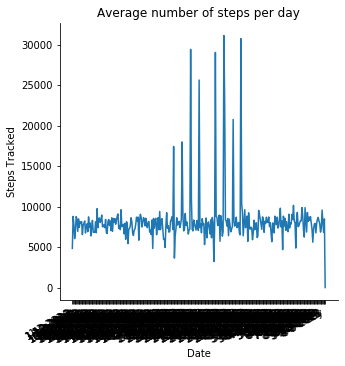

In [293]:
g = sns.relplot(x="index", y=928, kind="line", data=mean_steps2)
plt.title('Average number of steps per day')
plt.xlabel('Date')#Labeling the variable for plotting
plt.ylabel('Steps Tracked')#Labeling the variable for plotting
g.fig.autofmt_xdate()

The above chart depicts the number of steps tracked each day

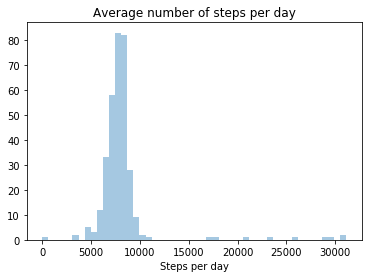

In [294]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Steps per day')#Labeling the variable for plotting
#mean_steps.name = 'Steps per day' #Labeling the variable for plotting
steps = mean_steps.dropna() #Selecting the new mean column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(steps, kde=False) 
plt.title('Average number of steps per day')
plt.show()

The distribution chart pictured above, shows the average number of steps per day.

## Analysis of the average number of steps per day

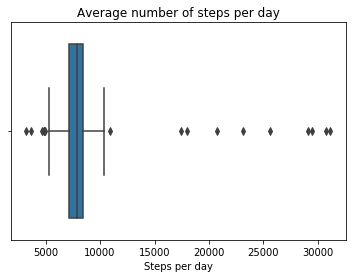

In [278]:
sns.boxplot(mean_steps)
plt.title('Average number of steps per day')
plt.xlabel('Steps per day')
plt.show()

As shown by the boxplot, the average number of steps per day varies quite a bit. The majority of the days contain between 5000 and 10000 steps, as shown by the lower and upper whiskers, however; the outliers range all the way from below 5000 steps per day to above 30000 steps per day. 

The median number of steps is: 7856.073033707865 steps
The mean number of steps is: 8202.974536861735 steps


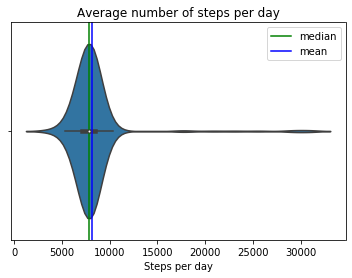

In [279]:
mean_size = mean.mean()
median_size = mean.median()

print(f'The median number of steps is: {median_size} steps')
print(f'The mean number of steps is: {mean_size} steps')

sns.violinplot(steps, kde=False)
plt.title('Average number of steps per day')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

As shown by the violin plot, the data set is skewed right. The mean of this dataset is larger than the median which is causing the right skewedness. 

Next, we can take a look at the average and the standard deviation to review the amount of variance among the dataset

## Standard Deviation

In [280]:
import numpy as np #import numpy to do calculations
mean_steps2=np.mean(mean) #calculate the mean for all of the days
STDV_steps=np.std(mean) #calculate the standard deviation 

print("The mean of the average number of steps per day")
print("for all of the days measured is: ", mean_steps2)
print(" ")#formatting purposes
print("The standard deviation is: ", STDV_steps)

The mean of the average number of steps per day
for all of the days measured is:  8202.974536861735
 
The standard deviation is:  3123.1365625711724


The standard deviation reveals the variance within the data set. Since the standard deviation is quite high, approximately 3123.14; we know that the values for the number of steps per day varied quite a bit from day to day. Further analysis can be done to determine why this variance occured. For example, perhaps some users failed to wear their activity trackers on certain days. 